<a href="https://colab.research.google.com/github/digitalakhil/TSF-internship/blob/main/students_marks_predictor_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Problem

In [2]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [4]:
# r means the string we take use as it is
path = r"student_scores.csv"
df = pd.read_csv(path)


In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.shape

(25, 2)

# Discover and visualize the data to gain insights

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


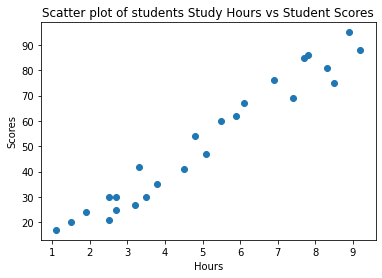

In [10]:
plt.scatter(x=df.Hours , y = df.Scores)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scatter plot of students Study Hours vs Student Scores")
plt.show()

#Prepare the data for Machine Learning

Data cleaning

In [12]:
df.isnull().sum()# count how much null value is present in our dataset

Hours     0
Scores    0
dtype: int64

In [15]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In ML model we use 70% or 80% data to train our Model and use 20% or 30% data to testing the Model for that we have a simple class which name is train_test _split which is avaliable in sckitlearn

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=51)
 # X is independent variable and y is dependent variable
print("shape of X_train = " , X_train.shape)
print("shape of y_train = " , y_train.shape)
print("shape of X_test = " , X_test.shape)
print("shape of y_test = " , y_test.shape)

shape of X_train =  (20, 1)
shape of y_train =  (20,)
shape of X_test =  (5, 1)
shape of y_test =  (5,)


# select a model and train it

our data is in linear form we use Linear Regression  

Mathematical Formula of Linear Regression is : y = m*x+c

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


by using fit method we trained our model

In [18]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

how much dataset is large that much time take the ML in training of data 

In LinearRegression when we trained our data during this time ML Model find the value of  m and c.

In [19]:
lr.coef_ # coef_ means m value

array([9.56433743])

In [20]:
lr.intercept_ # intercept_ gives the value of c.

2.701970681675242

Now we Test our Ml Model

In [21]:
y_pred = lr.predict(X_test)
y_pred


array([55.30582657, 76.34736893, 68.69589898, 82.08597139, 28.52568176])

In [23]:
pd.DataFrame(np.c_[X_test,y_test,y_pred], columns = ["Hours","Scores_original","Scores_predicted"])

,Hours,Scores_original,Scores_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


test accuraccy :  Fine-tune your model

In [24]:
lr.score(X_test,y_test) # it shows the accuracy of model here 95% is 

0.9238518102278781

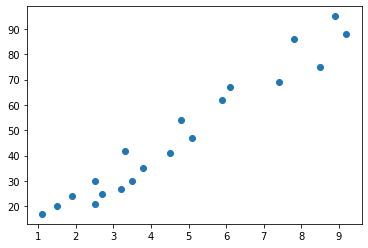

In [25]:
plt.scatter(X_train,y_train)

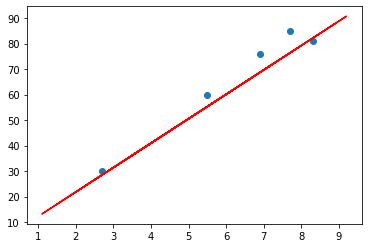

In [26]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train), color = "r")

Next Journy of ML is Present Your Solution

In [31]:
own_pred = lr.predict([[9.25]])
print(own_pred)

[91.17209195]


In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.642239029818247
